<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/datacollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpha_vantage
!pip install xgboost
!pip install pandas_ta==0.3.14b0
!pip install optuna
# First install compatible versions
!pip install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip install --upgrade numpy
!pip install --upgrade pandas_ta


In [ ]:
import pandas as pd
import numpy as np
# Fix for pandas_ta import issue
np.NaN = np.nan  # Create NaN as an alias to nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta
from alpha_vantage.timeseries import TimeSeries

add more data visualizations and insights

after engineering move to pyspark, describe in report why

transforming (remove nulls after cuz its about loading the data in first)

removing rows or mean imputation without a rolling window is not smart because of the timeseries nature of stocks, it would ruin indications of growing or shrinking trends in price


In [ ]:
import matplotlib.pyplot as plt

Data for LIT:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-16    38.48  38.6000   38.30     38.58   143462.0
2025-05-15    38.82  38.9662   38.47     38.74   128908.0
2025-05-14    39.29  39.5500   39.16     39.24   120114.0
2025-05-13    38.85  39.2800   38.85     39.19   164627.0
2025-05-12    38.80  39.2600   38.80     39.01   229707.0


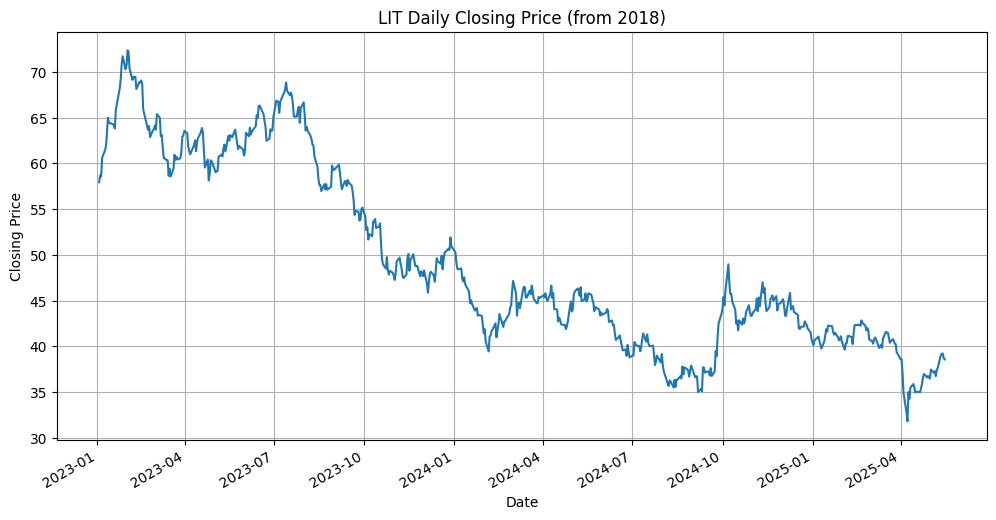

Data for REMX:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-16    39.41  39.4100  38.9400     39.31   103116.0
2025-05-15    39.65  39.8600  39.1900     39.67   141722.0
2025-05-14    40.08  40.2900  39.6337     39.77   126862.0
2025-05-13    39.86  40.1000  39.6200     39.93    52374.0
2025-05-12    40.10  40.3089  39.5550     39.67   123388.0


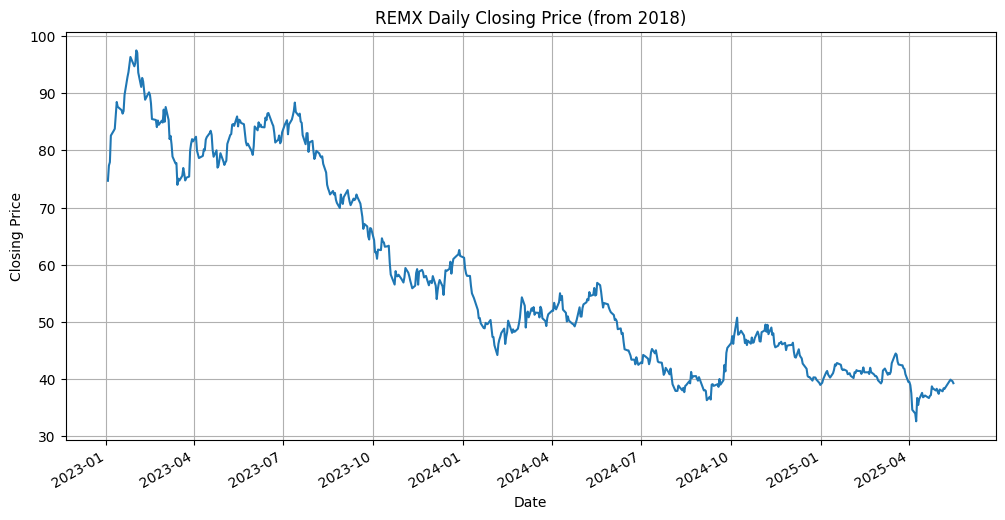

Data for URA:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-16    28.05   28.160  27.5701     27.71  2220237.0
2025-05-15    27.92   28.090  27.5701     28.01  2131299.0
2025-05-14    27.96   28.305  27.8600     28.15  2212220.0
2025-05-13    27.34   28.000  27.3000     27.84  3082168.0
2025-05-12    27.71   27.820  27.1714     27.29  2211863.0


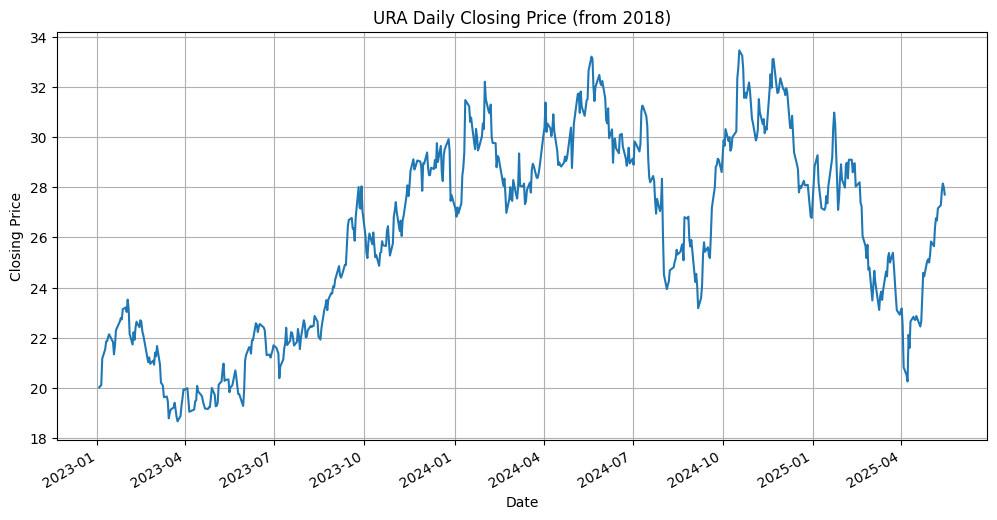

Data for GDX:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-16   45.410    46.35  45.245     46.33  17271971.0
2025-05-15   46.050    46.60  45.605     46.49  23456736.0
2025-05-14   45.505    45.66  45.100     45.55  26797018.0
2025-05-13   46.720    46.75  46.160     46.54  22356323.0
2025-05-12   48.055    48.08  46.345     46.62  42761575.0


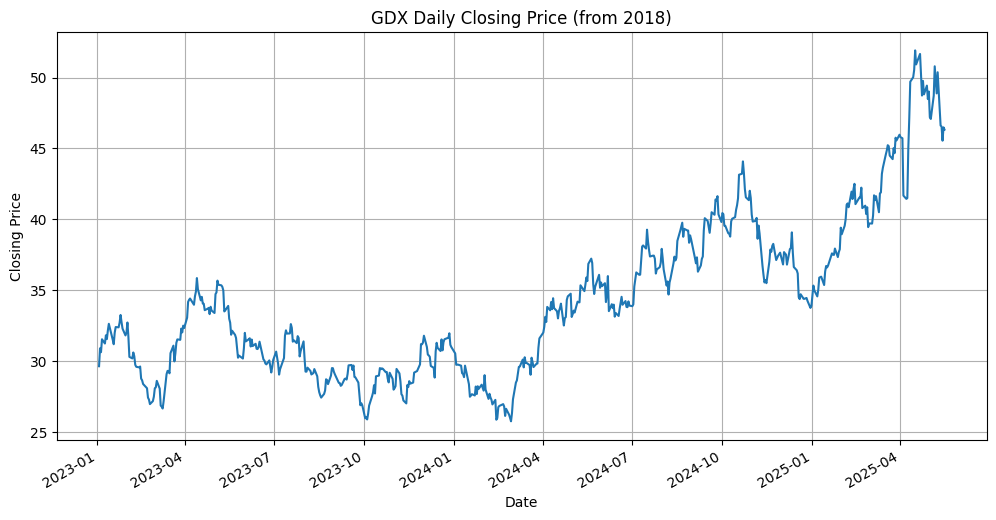

Data for GDXJ:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-16   57.630    58.71   57.46     58.71   5202932.0
2025-05-15   58.600    59.24   57.84     59.21   5814525.0
2025-05-14   57.975    58.26   57.40     57.88   7900770.0
2025-05-13   59.300    59.72   58.69     59.31   4870081.0
2025-05-12   61.235    61.31   58.91     59.12  12258875.0


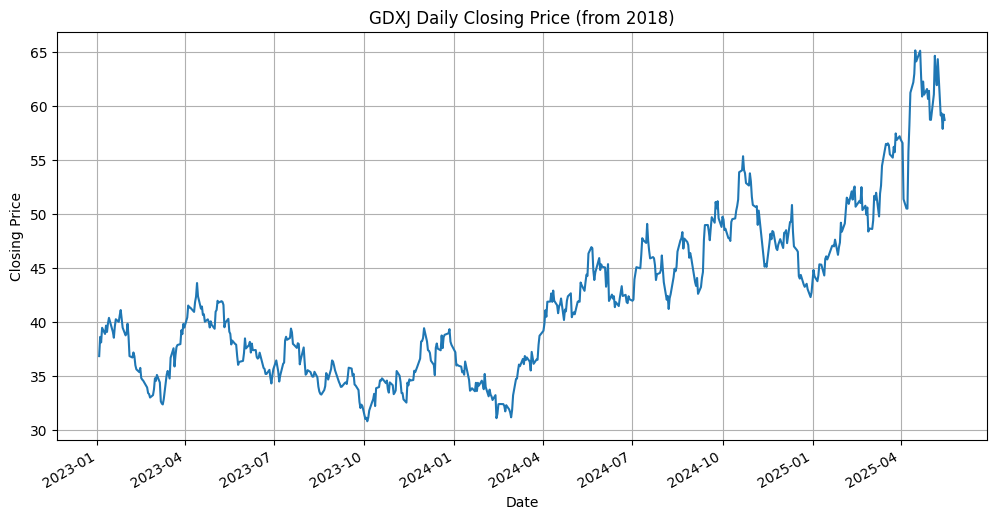

Data for XLE:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-16   85.800   85.850  84.605     85.48  10862912.0
2025-05-15   84.170   85.660  83.960     85.61  14860766.0
2025-05-14   85.195   85.580  84.920     85.25  10666327.0
2025-05-13   85.000   86.445  84.660     85.77  14515784.0
2025-05-12   85.480   85.870  83.960     84.58  16305028.0


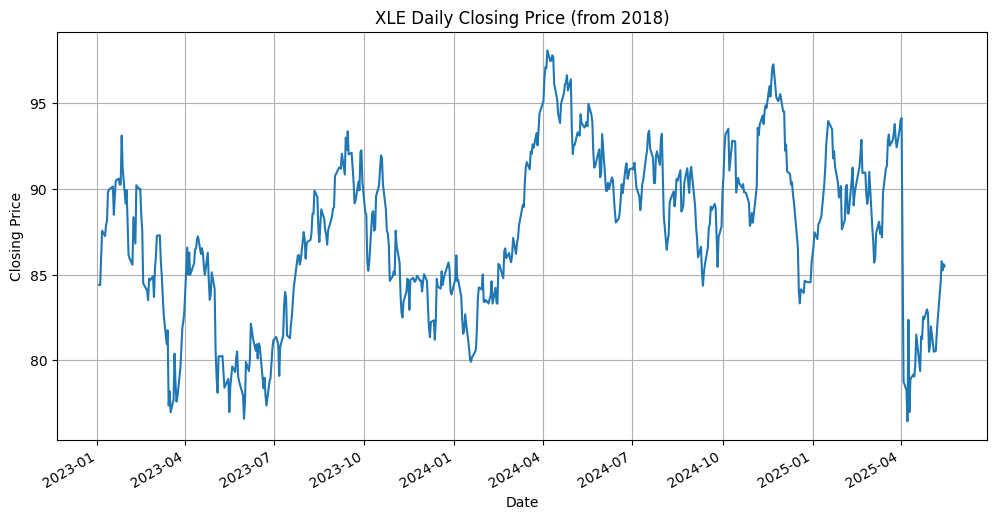

Data for ICLN:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-16    13.05   13.050  12.8799     12.96  1719319.0
2025-05-15    12.89   13.080  12.8500     13.00  2736296.0
2025-05-14    12.85   12.960  12.8300     12.93  3522216.0
2025-05-13    12.65   12.930  12.6000     12.81  3869482.0
2025-05-12    12.39   12.445  12.2500     12.35  3588033.0


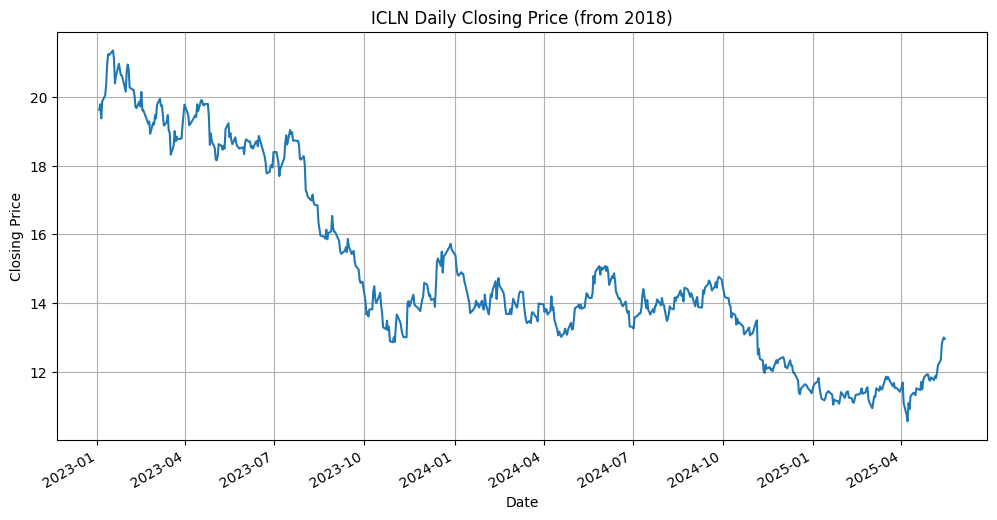

Data for SPY:
            1. open  2. high    3. low  4. close   5. volume
date                                                        
2025-05-16   591.25   594.50  589.2800    594.20  76052101.0
2025-05-15   585.56   590.97  585.0969    590.46  71268145.0
2025-05-14   587.81   588.98  585.5350    587.59  66283531.0
2025-05-13   583.41   589.08  582.8400    586.84  67947225.0
2025-05-12   581.47   583.00  577.0400    582.99  78993570.0


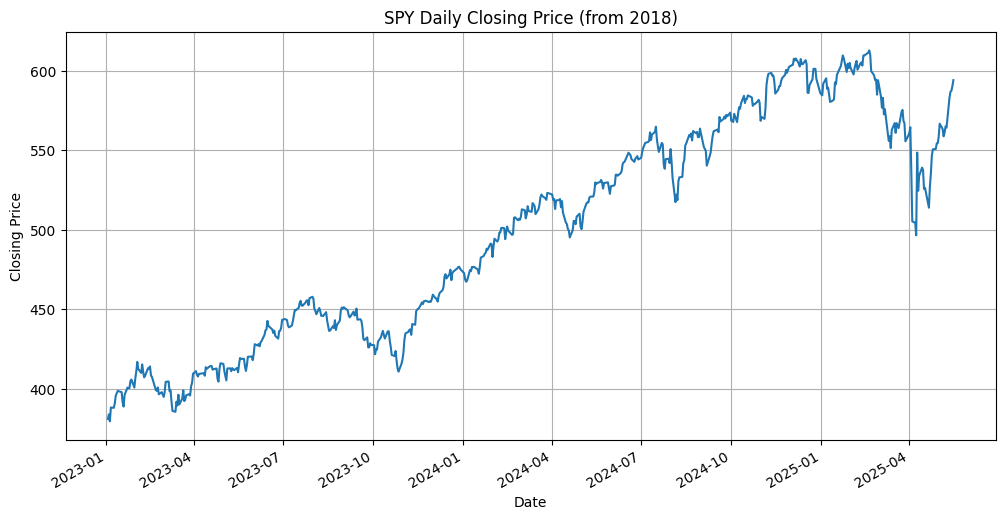

Data for GLD:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-16   292.62  294.575  291.78    294.24  14173039.0
2025-05-15   294.10  297.900  293.75    297.84  13497735.0
2025-05-14   293.67  294.800  291.96    293.16  14800596.0
2025-05-13   299.02  300.300  297.24    299.46  10233603.0
2025-05-12   298.33  299.470  296.82    298.19  14375881.0


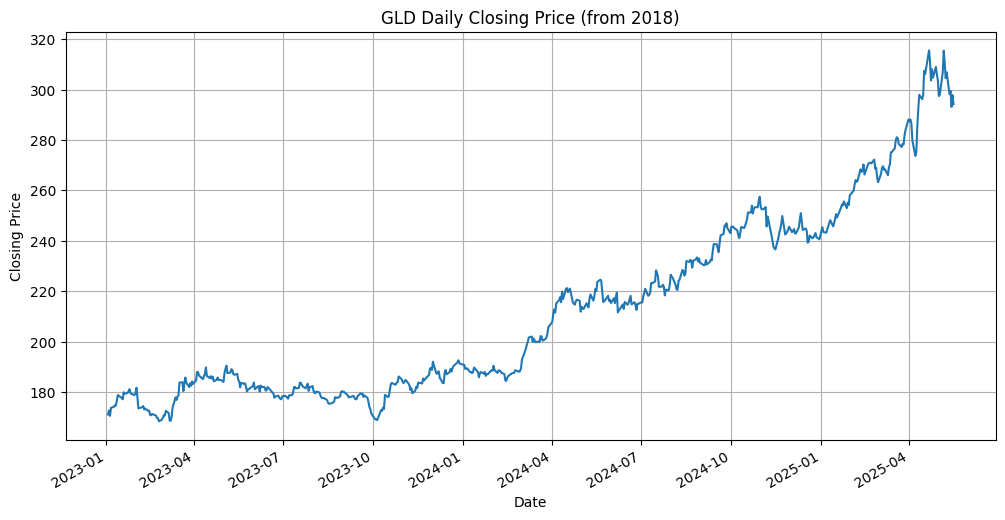

Data for CPER:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-16    28.83   28.910  28.5400     28.61   135681.0
2025-05-15    28.90   29.325  28.7994     29.27    95659.0
2025-05-14    29.26   29.260  28.9100     29.00   160079.0
2025-05-13    28.93   29.550  28.9200     29.41   316931.0
2025-05-12    28.96   28.960  28.6500     28.92   134220.0


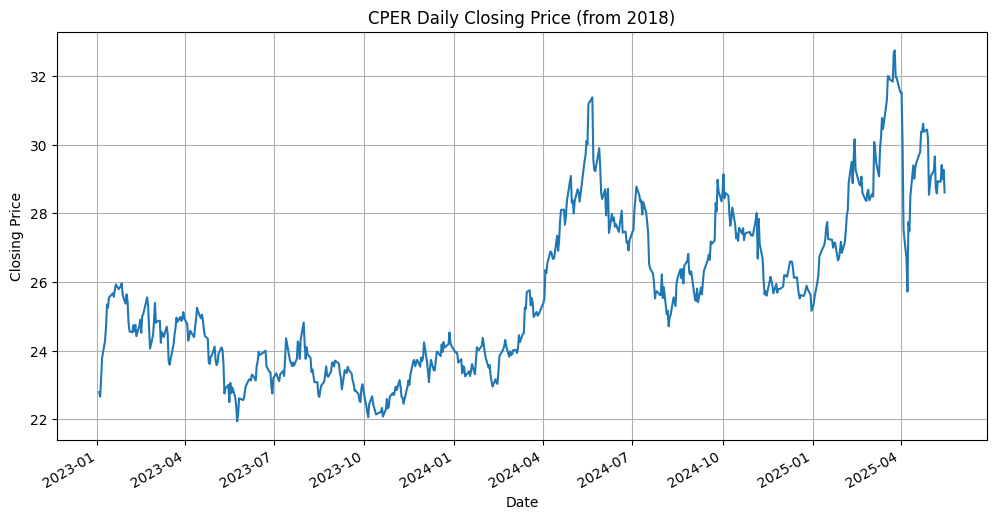

Data for USO:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-16    67.83    68.54   67.42     68.10  3769410.0
2025-05-15    67.41    67.79   66.87     67.59  5263445.0
2025-05-14    69.28    69.55   68.70     68.73  2802450.0
2025-05-13    68.45    69.88   68.40     69.59  4728018.0
2025-05-12    69.08    69.28   67.48     67.60  4861861.0


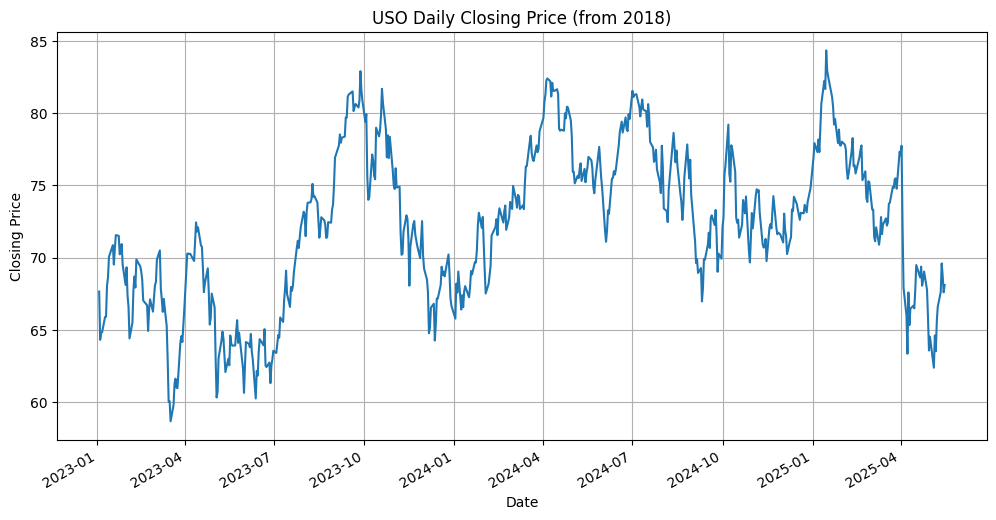

Data for UNG:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-16    17.04  17.2685   16.64     16.71  4364129.0
2025-05-15    17.39  17.5100   16.78     16.80  6212183.0
2025-05-14    17.64  17.8400   17.37     17.40  5132737.0
2025-05-13    18.52  18.5400   17.89     18.19  5938706.0
2025-05-12    18.38  18.4500   18.08     18.35  4895153.0


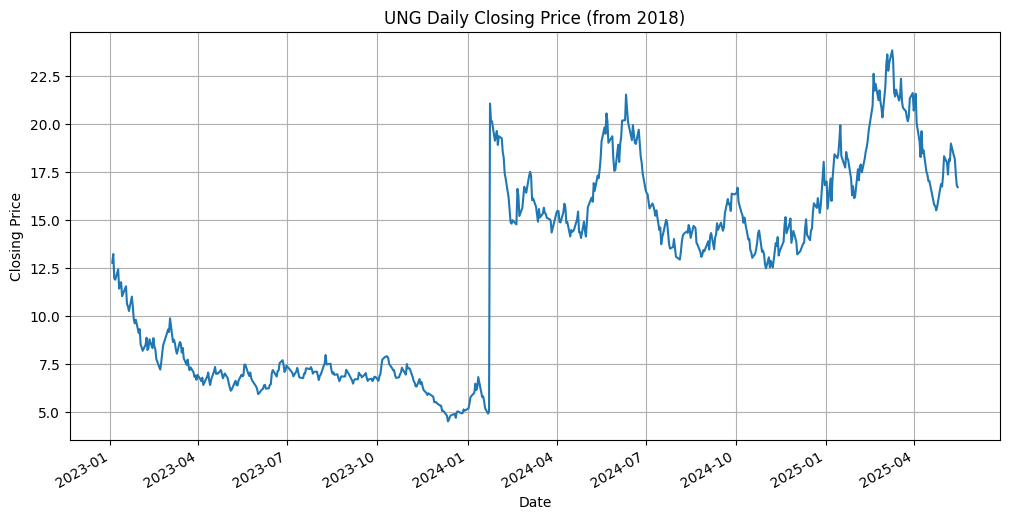

ValueError: We have detected your API key as PH8UF085L5T5MFZN and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [ ]:
# Step 3: Define your API key and list of symbols
api_key = 'PH8UF085L5T5MFZN'
symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG', 'KOL', 'JJN']

# Step 4: Fetch the data for each symbol using Alpha Vantage API
ts = TimeSeries(key=api_key, output_format='pandas')
all_data = {}
for symbol in symbols:
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    # Filter data from 2018 onwards
    data.index = pd.to_datetime(data.index)
    data = data[data.index >= '2023-01-01']
    all_data[symbol] = data
    print(f"Data for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset
    # Plot the data
    data['4. close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

In [ ]:
# Rename columns to match pandas_ta requirements
all_data['LIT'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['REMX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['URA'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDXJ'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['XLE'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['ICLN'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['SPY'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GLD'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['CPER'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['USO'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['UNG'].columns = ['open', 'high', 'low', 'close', 'volume']
# all_data['KOL'].columns = ['open', 'high', 'low', 'close', 'volume']
# all_data['JJN'].columns = ['open', 'high', 'low', 'close', 'volume']

<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 4992013.8632      4722482.1         5367896.1893      2066072.6
  5699680.53866667  5128097.76        5634391.83666667  3642181.
  3461227.66666667  4698872.93283333 14936557.4875     20468310.6542
  8433809.65        3352730.84        5631779.8152     13495791.73146667
  8467223.47333333  4756736.56666667  4989061.38666667 11617107.68
  4024466.77333333  5957352.34166667  5092986.17333333  5451365.44773333
 16653550.95        8437384.26        7810233.         13713973.2356
  8404913.08666667 10489956.655       8231352.2046     10638690.73333333
 13297536.          8305391.20586667 13780473.          6456091.72
  9531452.079       8458885.76        6968186.11       10922931.48
  5414422.86        9970298.          9810175.3465     14264198.82696667
 14360908.6084     11717513.64333333 11635007.97333333 10973650.43333333
 

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for LIT:
             open     high    low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                          
2025-05-16  38.48  38.6000  38.30  38.58  143462.0      NaN     NaN     NaN   
2025-05-15  38.82  38.9662  38.47  38.74  128908.0      NaN     NaN     NaN   
2025-05-14  39.29  39.5500  39.16  39.24  120114.0      NaN     NaN     NaN   
2025-05-13  38.85  39.2800  38.85  39.19  164627.0      NaN     NaN     NaN   
2025-05-12  38.80  39.2600  38.80  39.01  229707.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...       0        0 

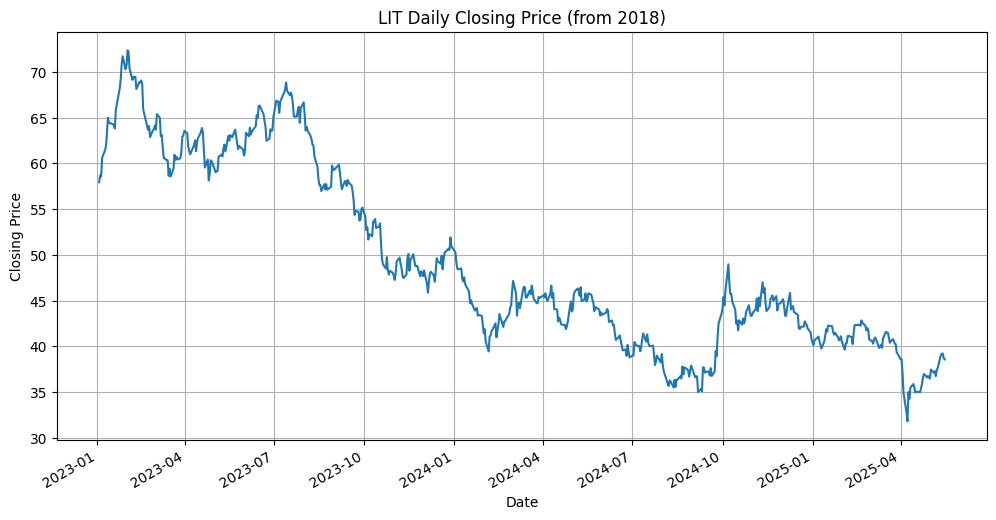

Number of technical indicators added to LIT: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 5608411.94666667  5061527.3898      1917201.5072      1641347.07333333
  3068579.1509      2910684.46666667  3322615.7356      4377092.58
  3496569.2763      6088323.41333333  8628793.12166667  5935856.62
 12240331.04       15797628.45876666 13522127.9364      3275212.22
  8835137.61        7787145.13333333  2632856.75333333 10748891.38396667
  9835553.175       4017156.6434      4108256.01666667  4322197.66
  5832853.         17145949.33333333  4295946.2         6595921.76
  8856419.5         6541037.28666667  2325348.         11555808.992
  3821609.20166667  1990052.16        3936343.08        8503529.68666667
  3152348.32        7347492.2        21617013.          1878163.55526667
  4754713.6         2765453.01093333  2428090.28        1734673.85
  3843838.6899      5614274.36666667  2070752.25        4524344.58
  21445

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for REMX:
             open     high      low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-16  39.41  39.4100  38.9400  39.31  103116.0      NaN     NaN     NaN   
2025-05-15  39.65  39.8600  39.1900  39.67  141722.0      NaN     NaN     NaN   
2025-05-14  40.08  40.2900  39.6337  39.77  126862.0      NaN     NaN     NaN   
2025-05-13  39.86  40.1000  39.6200  39.93   52374.0      NaN     NaN     NaN   
2025-05-12  40.10  40.3089  39.5550  39.67  123388.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...   

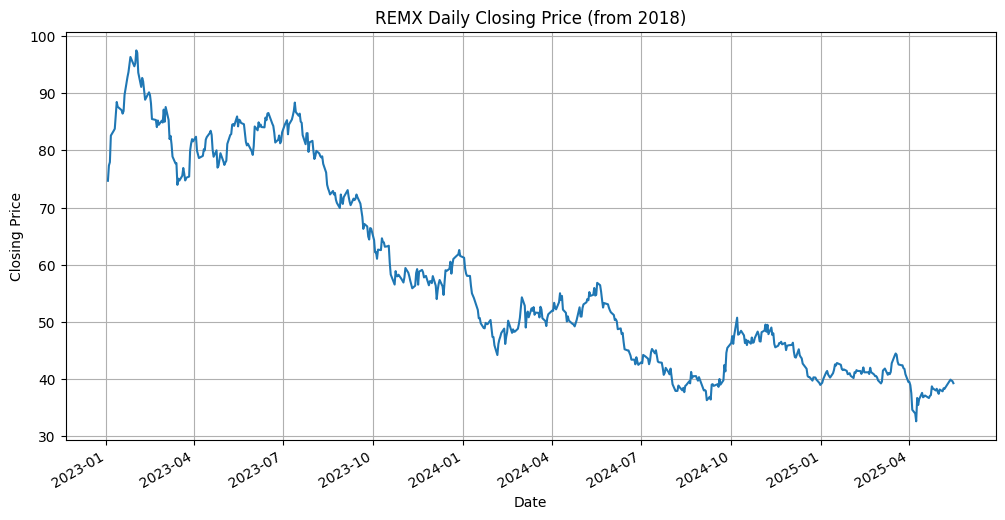

Number of technical indicators added to REMX: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.94420002e+07 6.21744431e+07 8.69899092e+07 3.54090043e+07
 5.70468816e+07 3.20806765e+07 1.25506996e+08 7.36068599e+07
 3.61460179e+07 5.34518818e+07 9.26654959e+07 4.04665521e+07
 6.39961761e+07 5.70958017e+07 6.44666131e+07 7.14404232e+07
 7.89277195e+07 1.00391271e+08 7.41856005e+07 5.88236471e+07
 9.88408820e+07 7.20795498e+07 1.92042833e+08 7.82544412e+07
 7.89689413e+07 1.16007858e+08 6.16019142e+07 6.76003507e+07
 5.05248199e+07 6.46532571e+07 4.08919199e+07 5.60064722e+07
 5.10312541e+07 5.47171096e+07 7.36063107e+07 5.25496390e+07
 1.99417680e+08 1.23536615e+08 5.79355104e+07 4.96495787e+07
 7.25033509e+07 8.38948879e+07 8.09209114e+07 8.09117142e+07
 9.38351233e+07 4.60337890e+07 4.47182114e+07 7.18154295e+07
 8.42101788e+07 8.54263260e+07 8.22187082e+07 7.02418158e+07
 6.65670669e+07 4.61729866e+07 9.57504102e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for URA:
             open    high      low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-16  28.05  28.160  27.5701  27.71  2220237.0      NaN     NaN     NaN   
2025-05-15  27.92  28.090  27.5701  28.01  2131299.0      NaN     NaN     NaN   
2025-05-14  27.96  28.305  27.8600  28.15  2212220.0      NaN     NaN     NaN   
2025-05-13  27.34  28.000  27.3000  27.84  3082168.0      NaN     NaN     NaN   
2025-05-12  27.71  27.820  27.1714  27.29  2211863.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...    

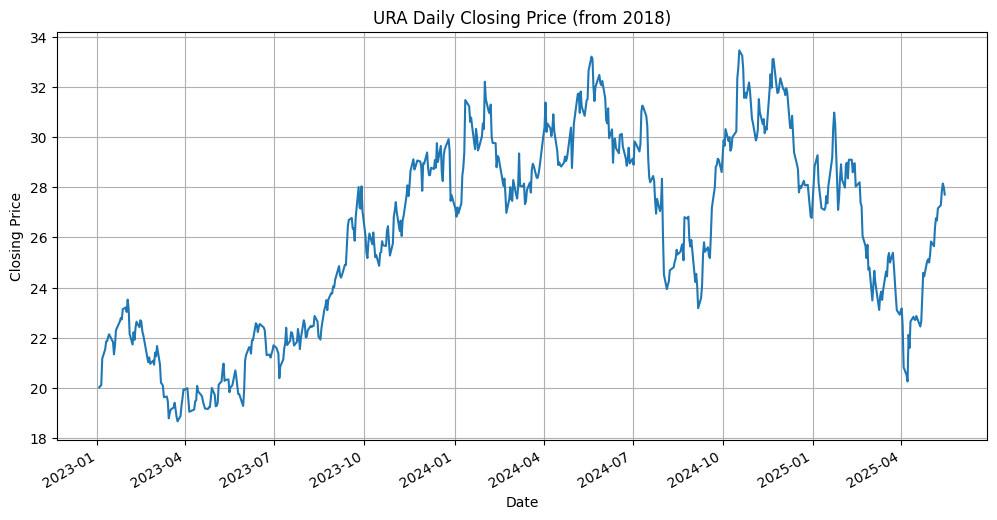

Number of technical indicators added to URA: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.08444400e+09 1.03919641e+09 2.01043545e+09 1.03438514e+09
 1.11680533e+09 1.56797912e+09 7.70639393e+08 6.38421822e+08
 7.42142548e+08 1.12781321e+09 1.92879635e+09 1.88581074e+09
 1.90484778e+09 2.03188339e+09 2.54956456e+09 1.38420980e+09
 7.25690029e+08 7.86605336e+08 9.91281110e+08 7.29753814e+08
 4.53309975e+08 7.71140261e+08 9.81573869e+08 7.13096358e+08
 8.74219044e+08 5.22501336e+08 5.18620974e+08 1.30860300e+09
 6.88152070e+08 8.85967843e+08 1.09448423e+09 7.27929003e+08
 1.07113773e+09 1.12187702e+09 5.21436833e+08 4.72472948e+08
 4.96084190e+08 7.17815111e+08 4.80513918e+08 3.61618953e+08
 3.01349620e+08 9.68924704e+08 1.14679018e+09 5.33612114e+08
 4.17292029e+08 7.19168818e+08 8.60564316e+08 8.18879040e+08
 1.15891512e+09 3.72171477e+08 3.07371225e+08 2.73937332e+08
 7.53978537e+08 8.90739539e+08 1.35043929e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GDX:
              open   high     low  close      volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-16  45.410  46.35  45.245  46.33  17271971.0      NaN     NaN     NaN   
2025-05-15  46.050  46.60  45.605  46.49  23456736.0      NaN     NaN     NaN   
2025-05-14  45.505  45.66  45.100  45.55  26797018.0      NaN     NaN     NaN   
2025-05-13  46.720  46.75  46.160  46.54  22356323.0      NaN     NaN     NaN   
2025-05-12  48.055  48.08  46.345  46.62  42761575.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...    

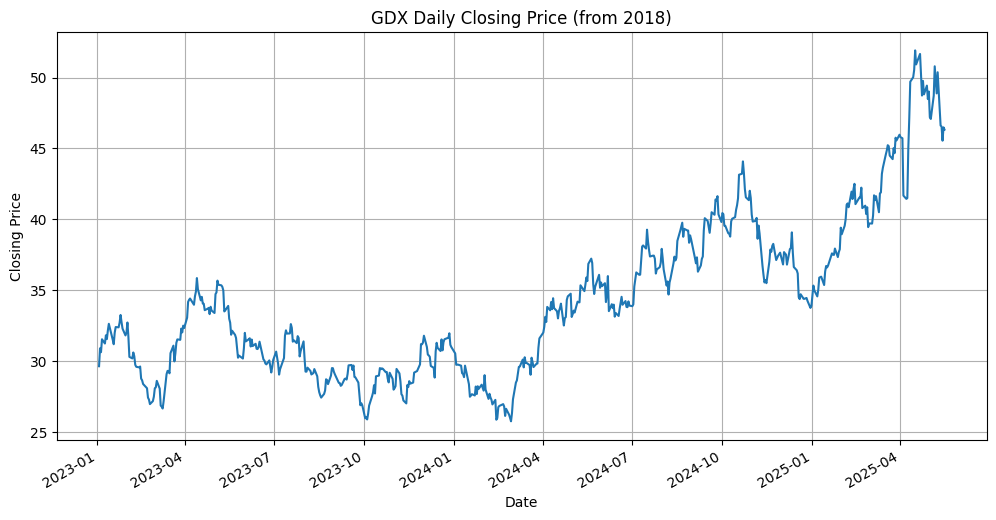

Number of technical indicators added to GDX: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.41680871e+08 2.88503598e+08 7.32835548e+08 3.10652602e+08
 3.23732562e+08 6.00146828e+08 2.02738765e+08 1.78307388e+08
 3.00943118e+08 2.24687203e+08 5.63588857e+08 4.53156060e+08
 5.39133378e+08 7.11893754e+08 3.70200793e+08 2.30695835e+08
 1.78743389e+08 2.43272096e+08 1.67951917e+08 1.48640083e+08
 2.10990708e+08 2.69047381e+08 2.80358531e+08 2.74810160e+08
 1.47612074e+08 1.35394253e+08 3.12427836e+08 2.57723661e+08
 2.72598345e+08 3.15299872e+08 2.41944578e+08 2.87495295e+08
 2.65519573e+08 2.77258111e+08 2.30219450e+08 1.41499733e+08
 1.11089106e+08 1.97016339e+08 1.37116219e+08 2.45410744e+08
 1.31684083e+08 1.40831815e+08 2.37496436e+08 3.01420804e+08
 1.54560564e+08 1.73643596e+08 2.30613816e+08 3.35893340e+08
 2.29524409e+08 1.40050003e+08 1.11569264e+08 3.76996981e+08
 2.16031263e+08 2.14608434e+08 2.17185992e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GDXJ:
              open   high    low  close      volume  SMA_100  EMA_20  WMA_20  \
date                                                                           
2025-05-16  57.630  58.71  57.46  58.71   5202932.0      NaN     NaN     NaN   
2025-05-15  58.600  59.24  57.84  59.21   5814525.0      NaN     NaN     NaN   
2025-05-14  57.975  58.26  57.40  57.88   7900770.0      NaN     NaN     NaN   
2025-05-13  59.300  59.72  58.69  59.31   4870081.0      NaN     NaN     NaN   
2025-05-12  61.235  61.31  58.91  59.12  12258875.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...       0  

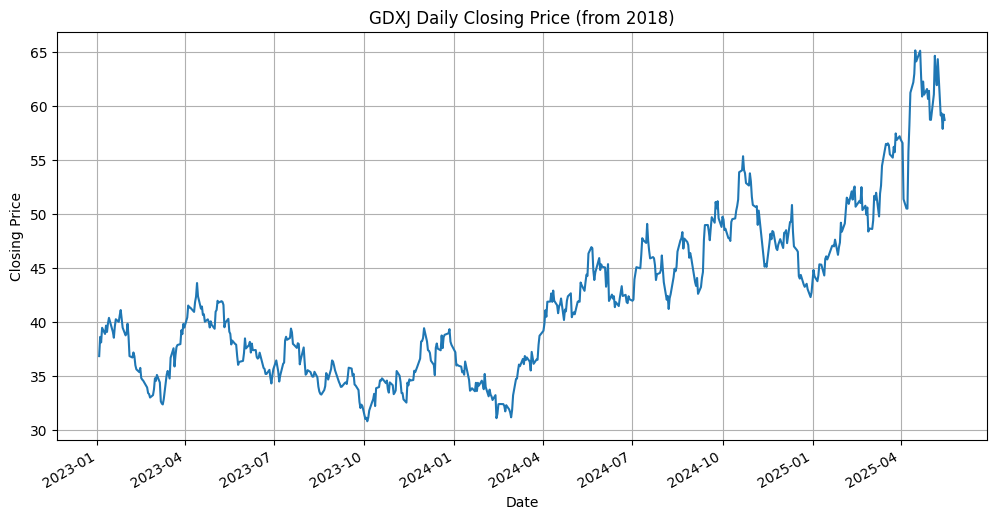

Number of technical indicators added to GDXJ: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.09304377e+08 1.24291400e+09 9.26755444e+08 1.30656913e+09
 8.18999796e+08 6.80356519e+08 8.72135854e+08 1.95280204e+09
 4.75968242e+09 4.45773917e+09 4.06550765e+09 3.32629711e+09
 1.59229924e+09 8.91063776e+08 1.20248638e+09 1.53978586e+09
 1.41573277e+09 1.76467069e+09 2.20259273e+09 2.20037350e+09
 1.20190310e+09 1.19692459e+09 1.19579072e+09 1.43014878e+09
 1.30949483e+09 1.73964003e+09 1.19528723e+09 1.84185844e+09
 9.80066490e+08 1.96852112e+09 1.76170541e+09 1.67996185e+09
 1.44636829e+09 1.33737364e+09 1.35328423e+09 1.65527590e+09
 2.30462461e+09 1.11993760e+09 1.10044753e+09 8.62911416e+08
 1.49757994e+09 2.09776530e+09 1.66696720e+09 1.38279761e+09
 1.09917053e+09 9.98533691e+08 9.77314696e+08 1.04588130e+09
 1.05583171e+09 1.07870743e+09 1.19797048e+09 1.05000083e+09
 1.50872922e+09 8.46364011e+08 6.50799409e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for XLE:
              open    high     low  close      volume  SMA_100  EMA_20  \
date                                                                     
2025-05-16  85.800  85.850  84.605  85.48  10862912.0      NaN     NaN   
2025-05-15  84.170  85.660  83.960  85.61  14860766.0      NaN     NaN   
2025-05-14  85.195  85.580  84.920  85.25  10666327.0      NaN     NaN   
2025-05-13  85.000  86.445  84.660  85.77  14515784.0      NaN     NaN   
2025-05-12  85.480  85.870  83.960  84.58  16305028.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-16     NaN     NaN      NaN  ...       0        0       1   
2025-05-15     NaN     NaN      NaN  ...       0        0       1   
2025-05-14     NaN     NaN     

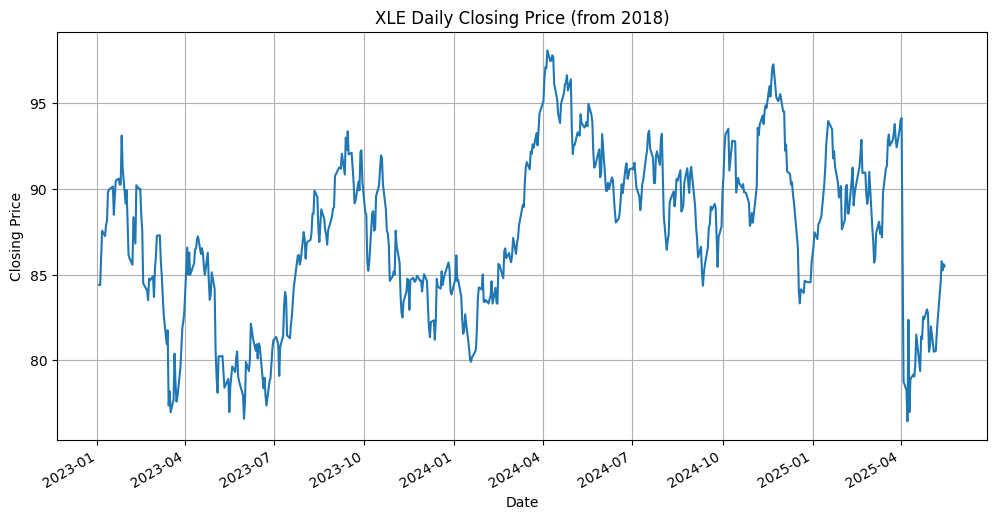

Number of technical indicators added to XLE: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.55080011e+07 2.39064860e+07 1.78195880e+07 1.04994021e+07
 1.98724428e+07 1.82738893e+07 1.88420242e+07 5.86193410e+07
 3.81074523e+07 4.59686315e+07 3.01587361e+07 1.34842557e+07
 1.87745872e+07 1.79232433e+07 2.59620374e+07 2.11891623e+07
 1.46515243e+07 1.50909273e+07 2.18699157e+07 2.49446583e+07
 1.87938872e+07 2.13793774e+07 2.54102793e+07 2.62216240e+07
 2.70073727e+07 1.97361843e+07 3.01135430e+07 1.71856540e+07
 2.52999143e+07 3.72530024e+07 3.43028802e+07 4.38258434e+07
 2.82533439e+07 3.57518727e+07 2.45272240e+07 5.65742149e+07
 4.12038304e+07 2.22397267e+07 3.52275970e+07 2.64378813e+07
 2.04086142e+07 1.94963636e+07 6.34117205e+07 4.54074562e+07
 4.13424051e+07 3.96056982e+07 5.05988886e+07 4.05333630e+07
 3.61973342e+07 6.16744798e+07 4.73942557e+07 5.95859589e+07
 3.15113264e+07 3.07602068e+07 1.06853075e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for ICLN:
             open    high      low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                            
2025-05-16  13.05  13.050  12.8799  12.96  1719319.0      NaN     NaN     NaN   
2025-05-15  12.89  13.080  12.8500  13.00  2736296.0      NaN     NaN     NaN   
2025-05-14  12.85  12.960  12.8300  12.93  3522216.0      NaN     NaN     NaN   
2025-05-13  12.65  12.930  12.6000  12.81  3869482.0      NaN     NaN     NaN   
2025-05-12  12.39  12.445  12.2500  12.35  3588033.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...   

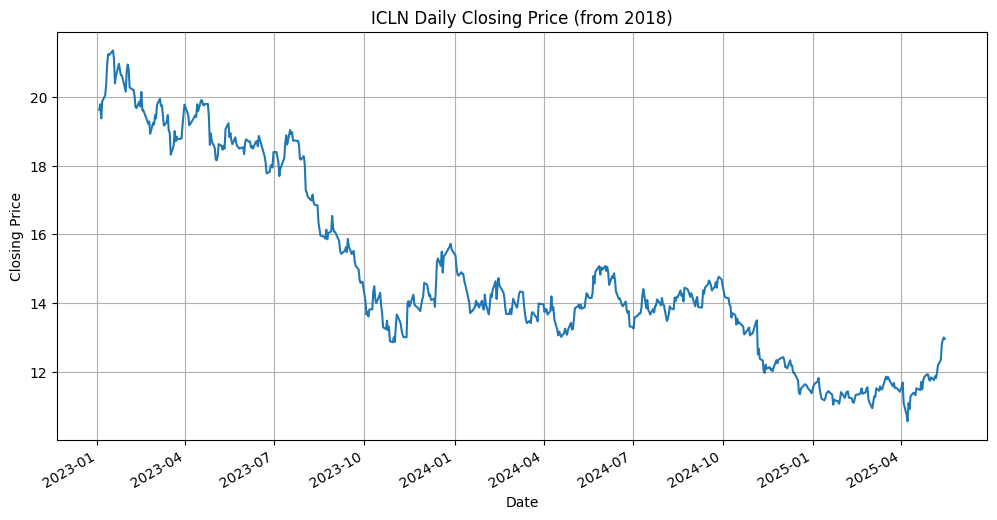

Number of technical indicators added to ICLN: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.68438349e+10 2.18019971e+10 3.43562601e+10 2.64088129e+10
 4.21033917e+10 4.40754013e+10 3.06775859e+10 1.28213059e+11
 1.11613405e+11 6.80899725e+10 4.27391774e+10 4.00593633e+10
 2.39341137e+10 2.98072062e+10 2.20617074e+10 3.56482144e+10
 3.77086244e+10 2.77586961e+10 3.88689346e+10 5.45521205e+10
 4.65023784e+10 4.60012486e+10 4.13379127e+10 4.35845273e+10
 5.23986616e+10 2.57904271e+10 3.03870242e+10 4.61595599e+10
 2.22867801e+10 1.89758817e+10 1.81703012e+10 2.16465587e+10
 4.02880143e+10 2.67657445e+10 2.10575324e+10 4.25225247e+10
 2.78350924e+10 3.56955147e+10 2.84274369e+10 3.34925685e+10
 3.32752872e+10 3.86253549e+10 2.48295503e+10 6.41761611e+10
 3.36936351e+10 2.65051970e+10 1.90926282e+10 1.74111538e+10
 2.10381176e+10 1.89938204e+10 1.91578578e+10 2.73735332e+10
 2.31325129e+10 2.82970206e+10 2.25010711e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for SPY:
              open    high       low   close      volume  SMA_100  EMA_20  \
date                                                                        
2025-05-16  591.25  594.50  589.2800  594.20  76052101.0      NaN     NaN   
2025-05-15  585.56  590.97  585.0969  590.46  71268145.0      NaN     NaN   
2025-05-14  587.81  588.98  585.5350  587.59  66283531.0      NaN     NaN   
2025-05-13  583.41  589.08  582.8400  586.84  67947225.0      NaN     NaN   
2025-05-12  581.47  583.00  577.0400  582.99  78993570.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-16     NaN     NaN      NaN  ...       0        0       1   
2025-05-15     NaN     NaN      NaN  ...       0        0       1   
2025-05-14

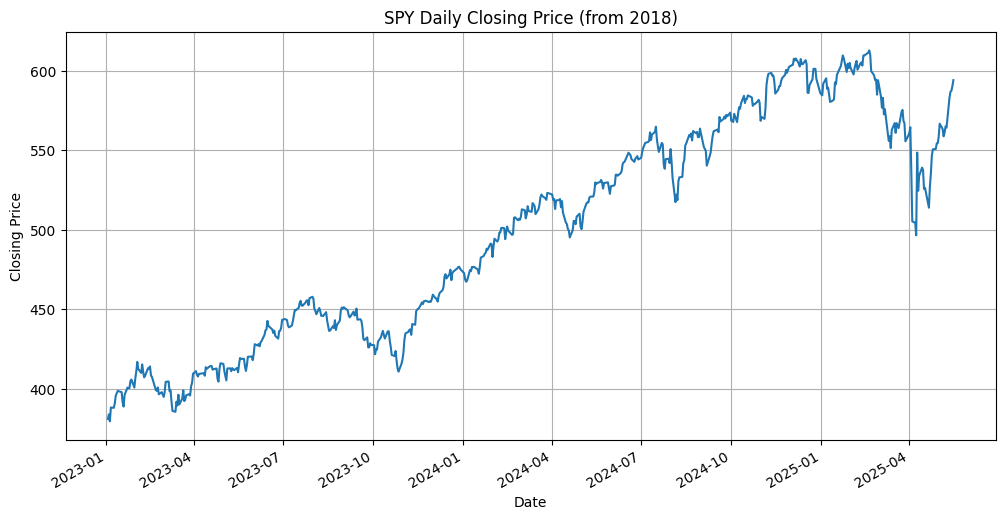

Number of technical indicators added to SPY: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.00203344e+09 3.05984730e+09 2.12329929e+09 2.46287649e+09
 3.59572232e+09 2.53643683e+09 2.09448324e+09 2.87874236e+09
 3.33040022e+09 1.10320106e+10 6.42367885e+09 6.36730310e+09
 6.28198474e+09 6.03749936e+09 5.86970045e+09 3.19156903e+09
 1.41965092e+09 2.60358120e+09 1.64383142e+09 2.47506443e+09
 2.80381192e+09 1.88236253e+09 2.48754920e+09 1.95184727e+09
 2.71061869e+09 1.45986428e+09 1.99371990e+09 2.25083257e+09
 1.91773467e+09 3.55227614e+09 3.35631388e+09 1.35845446e+09
 1.88018982e+09 1.32584629e+09 2.31595729e+09 3.07357386e+09
 1.18909691e+09 1.52932767e+09 1.14176065e+09 1.13011070e+09
 2.30644340e+09 1.92858497e+09 1.07839406e+09 8.10638850e+08
 2.51165014e+09 2.76282073e+09 1.16853286e+09 1.12814296e+09
 6.62681157e+08 2.60585540e+09 1.87096386e+09 1.95855631e+09
 2.01430359e+09 2.43864242e+09 2.81995929e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for GLD:
              open     high     low   close      volume  SMA_100  EMA_20  \
date                                                                       
2025-05-16  292.62  294.575  291.78  294.24  14173039.0      NaN     NaN   
2025-05-15  294.10  297.900  293.75  297.84  13497735.0      NaN     NaN   
2025-05-14  293.67  294.800  291.96  293.16  14800596.0      NaN     NaN   
2025-05-13  299.02  300.300  297.24  299.46  10233603.0      NaN     NaN   
2025-05-12  298.33  299.470  296.82  298.19  14375881.0      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
date                                 ...                            
2025-05-16     NaN     NaN      NaN  ...       0        0       1   
2025-05-15     NaN     NaN      NaN  ...       0        0       1   
2025-05-14     Na

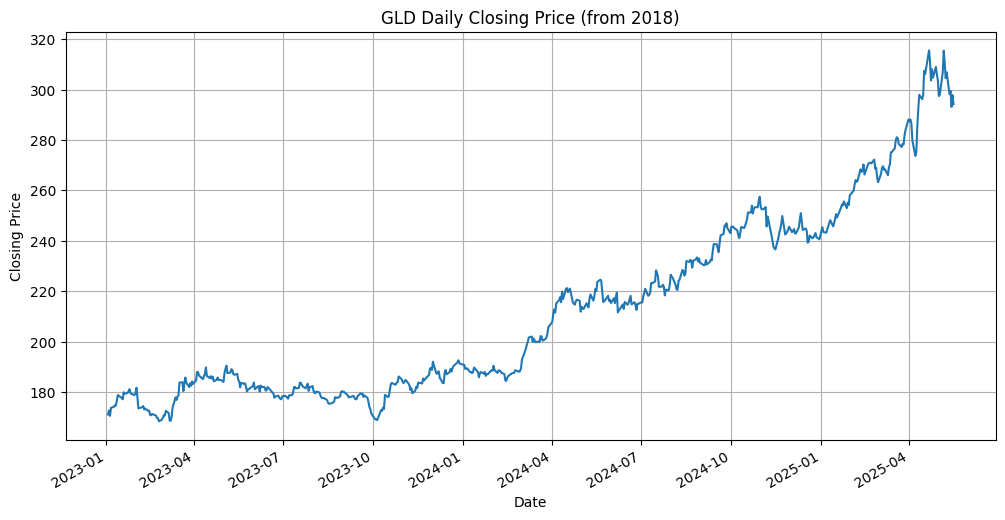

Number of technical indicators added to GLD: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2786686.96986667  9283965.42666667  1146807.57333333  7159431.73333333
  2420698.907       2544427.86666667  2026230.15        1909283.8
  6035458.1045     16240641.96       14416812.16053333 18418385.03586667
  4271858.46953333  6845750.5856     10789396.27666667  8756991.86666667
  9301251.48333333  3137559.9         6075973.66666667  3688009.096
  1987604.06666667  1941246.09566667  2233585.66666667  1967873.06666667
  5905891.29        5378587.9875      4725193.6         1268354.7
  5548670.08        2952089.42        7090239.33333333  4566569.159
  1600964.81666667   850485.0463       985055.3424      1908590.63153333
  1934474.91        1252508.56363333  2102320.92156667   791611.48543333
  1182678.58316667   963614.19466667  3700014.06         530849.9288
  1477396.37666667   568505.10663333  1360118.8         18572

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for CPER:
             open    high      low  close    volume  SMA_100  EMA_20  WMA_20  \
date                                                                           
2025-05-16  28.83  28.910  28.5400  28.61  135681.0      NaN     NaN     NaN   
2025-05-15  28.90  29.325  28.7994  29.27   95659.0      NaN     NaN     NaN   
2025-05-14  29.26  29.260  28.9100  29.00  160079.0      NaN     NaN     NaN   
2025-05-13  28.93  29.550  28.9200  29.41  316931.0      NaN     NaN     NaN   
2025-05-12  28.96  28.960  28.6500  28.92  134220.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...       0  

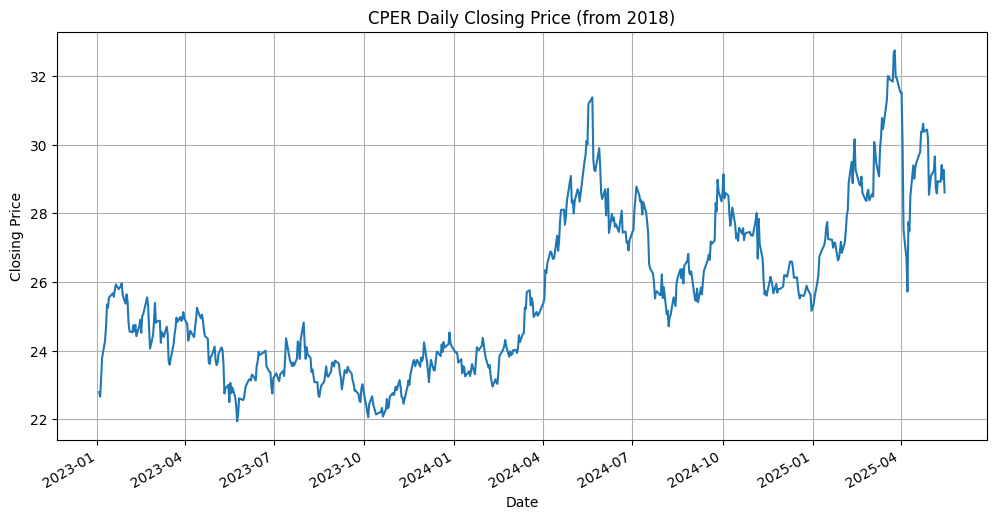

Number of technical indicators added to CPER: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.93350367e+08 3.27604367e+08 3.72455037e+08 4.53472376e+08
 6.85600074e+08 3.07653536e+08 2.19792429e+08 2.24962650e+08
 6.08892831e+08 3.12468671e+08 3.30678757e+08 2.09126068e+08
 1.00195374e+09 5.24922098e+08 6.27041123e+08 4.52952069e+08
 2.17452786e+08 1.19805965e+08 1.86728050e+08 1.98732420e+08
 2.09118494e+08 1.73453720e+08 3.03725999e+08 1.47986452e+08
 2.95469842e+08 1.76327917e+08 1.98812158e+08 1.77787950e+08
 2.22312315e+08 1.26824416e+08 1.44454872e+08 3.77214643e+08
 1.78641025e+08 1.51488829e+08 4.73379315e+08 3.26954455e+08
 1.74595564e+08 1.25062462e+08 1.53074685e+08 3.03510990e+08
 2.25666010e+08 1.95199703e+08 1.89744540e+08 2.98826424e+08
 4.09619196e+08 4.15670374e+08 3.05574918e+08 1.46081542e+08
 7.45777968e+07 1.16499299e+08 1.53495030e+08 1.71642423e+08
 1.43914125e+08 2.01019720e+08 2.23591313e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for USO:
             open   high    low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                         
2025-05-16  67.83  68.54  67.42  68.10  3769410.0      NaN     NaN     NaN   
2025-05-15  67.41  67.79  66.87  67.59  5263445.0      NaN     NaN     NaN   
2025-05-14  69.28  69.55  68.70  68.73  2802450.0      NaN     NaN     NaN   
2025-05-13  68.45  69.88  68.40  69.59  4728018.0      NaN     NaN     NaN   
2025-05-12  69.08  69.28  67.48  67.60  4861861.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...       0        0       1

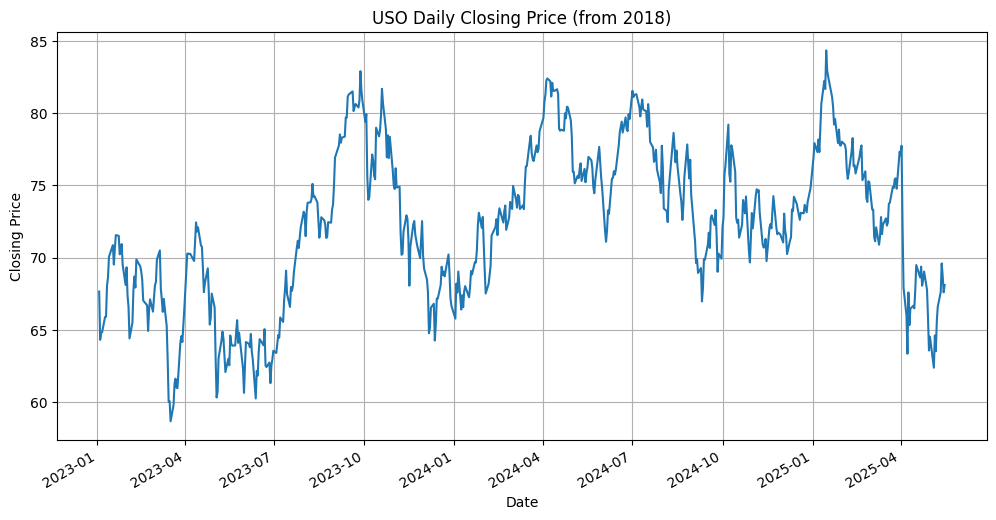

Number of technical indicators added to USO: 66


<ipython-input-7-fdeeda7c5e3a>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.05793476e+08 9.00110979e+07 1.08124041e+08 8.95486655e+07
 1.12573640e+08 9.60155623e+07 1.22898420e+08 1.10064425e+08
 1.31562030e+08 1.29154171e+08 9.93049164e+07 8.68647636e+07
 8.32911610e+07 1.07216583e+08 1.51227965e+08 1.71212255e+08
 2.62338892e+08 1.69012949e+08 1.27814275e+08 1.05005809e+08
 1.48350343e+08 1.19209541e+08 1.14594105e+08 1.10965645e+08
 1.46753446e+08 1.27992128e+08 8.40860602e+07 1.22561380e+08
 1.67751337e+08 2.12855575e+08 1.90482996e+08 2.96736852e+08
 1.42377207e+08 1.16186786e+08 1.16163064e+08 2.74328617e+08
 5.67948139e+08 1.25720337e+08 1.63380626e+08 1.25242836e+08
 9.37428341e+07 1.34289138e+08 1.14117042e+08 1.85703801e+08
 1.71442279e+08 3.21005051e+08 2.73839606e+08 2.81703833e+08
 2.41881552e+08 5.53921475e+08 6.62930432e+07 1.82302668e+08
 1.00771269e+08 1.97419058e+08 9.53493736e+

[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.

Data for UNG:
             open     high    low  close     volume  SMA_100  EMA_20  WMA_20  \
date                                                                           
2025-05-16  17.04  17.2685  16.64  16.71  4364129.0      NaN     NaN     NaN   
2025-05-15  17.39  17.5100  16.78  16.80  6212183.0      NaN     NaN     NaN   
2025-05-14  17.64  17.8400  17.37  17.40  5132737.0      NaN     NaN     NaN   
2025-05-13  18.52  18.5400  17.89  18.19  5938706.0      NaN     NaN     NaN   
2025-05-12  18.38  18.4500  18.08  18.35  4895153.0      NaN     NaN     NaN   

            HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  FISHERT_9_1  \
date                         ...                                         
2025-05-16     NaN      NaN  ...       0        0       1          NaN   
2025-05-15     NaN      NaN  ...       0   

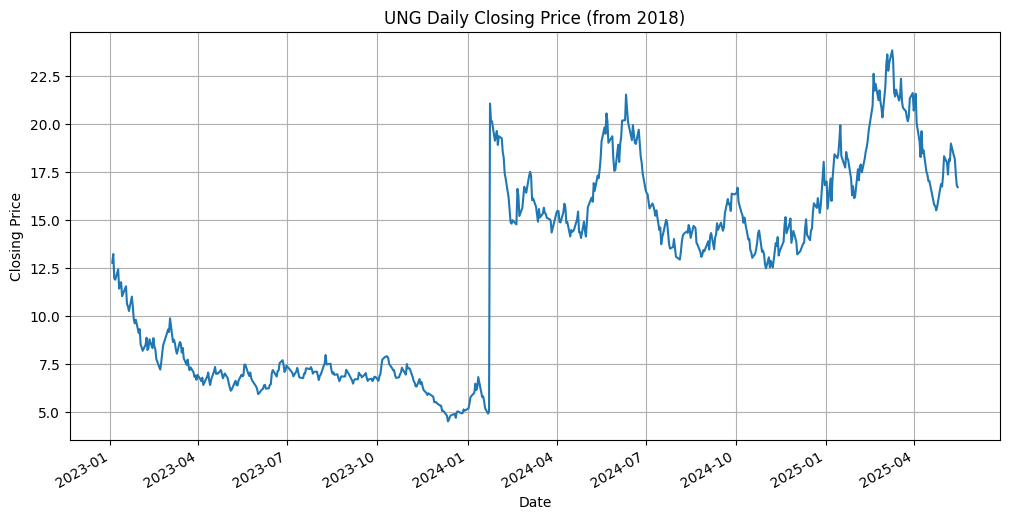

Number of technical indicators added to UNG: 66


In [ ]:
# Apply technical indicators to each dataframe
for symbol, data in all_data.items():
    # Trend Indicators
    data.ta.sma(length=100, append=True)               # Simple Moving Average
    data.ta.ema(length=20, append=True)               # Exponential Moving Average
    data.ta.wma(length=20, append=True)               # Weighted Moving Average
    data.ta.hma(length=20, append=True)               # Hull Moving Average
    data.ta.vwma(length=20, append=True)              # Volume-Weighted Moving Average
    data.ta.macd(fast=12, slow=26, signal=9, append=True)  # MACD
    data.ta.adx(length=14, append=True)               # Average Directional Index
    data.ta.cci(length=20, append=True)               # Commodity Channel Index
    data.ta.rsi(length=14, append=True)               # Relative Strength Index
    data.ta.stoch(k=14, d=3, append=True)             # Stochastic Oscillator
    data.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)  # Ichimoku Cloud
    data.ta.supertrend(length=7, multiplier=3, append=True)  # SuperTrend
    data.ta.psar(step=0.02, max_step=0.2, append=True)  # Parabolic SAR

    # Momentum Indicators
    data.ta.mom(length=50, append=True)               # Momentum
    data.ta.roc(length=10, append=True)               # Rate of Change
    data.ta.willr(length=14, append=True)             # Williams %R
    data.ta.uo(append=True)                           # Ultimate Oscillator
    data.ta.ao(fast=5, slow=34, append=True)          # Awesome Oscillator
    data.ta.kama(length=10, append=True)              # Kaufman's Adaptive MA
    data.ta.cg(length=10, append=True)                # Center of Gravity

    # Volatility Indicators
    data.ta.bbands(length=20, std=2, append=True)     # Bollinger Bands
    data.ta.atr(length=14, append=True)               # Average True Range
    data.ta.kc(length=20, scalar=2, append=True)      # Keltner Channel
    data.ta.donchian(lower_length=20, upper_length=20, append=True)  # Donchian Channel
    data.ta.rvi(length=14, append=True)               # Relative Volatility Index

    # Volume Indicators
    data.ta.obv(append=True)                          # On-Balance Volume
    data.ta.cmf(length=20, append=True)               # Chaikin Money Flow
    data.ta.adosc(fast=3, slow=10, append=True)       # AD Oscillator
    data.ta.mfi(length=14, append=True)               # Money Flow Index
    data.ta.vwap(append=True)                         # VWAP
    data.ta.eom(length=14, append=True)               # Ease of Movement
    data.ta.nvi(length=255, append=True)              # Negative Volume Index

    # Other Indicators
    data.ta.squeeze(append=True)                      # TTM Squeeze
    data.ta.fisher(length=9, append=True)             # Fisher Transform
    data.ta.decay(length=5, mode="linear", append=True)  # Linear Decay
    data.ta.decay(length=5, mode="exponential", append=True)  # Exponential Decay
    data.ta.vortex(length=14, append=True)            # Vortex Indicator
    data.ta.zscore(length=20, append=True)            # Z-Score
    data.ta.entropy(length=10, append=True)           # Entropy

    print(f"\nData for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset
    # Plot the data
    data['close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

    # Print the number of technical indicators added
    print(f"Number of technical indicators added to {symbol}: {len(data.columns) - 5}")  # Subtract 5 for OHLCV columns

In [ ]:
# Rename columns for each symbol to include the symbol name
for symbol, data in all_data.items():
    # Get the original column names
    original_columns = data.columns.tolist()
    # Create the new column names with the symbol prefix
    new_columns = [f"{symbol}_{col}" for col in original_columns]
    # Rename the columns in the DataFrame
    data.columns = new_columns
    print(f"\nColumns for {symbol} after renaming:")
    print(data.columns)


Columns for LIT after renaming:
Index(['LIT_open', 'LIT_high', 'LIT_low', 'LIT_close', 'LIT_volume',
       'LIT_SMA_100', 'LIT_EMA_20', 'LIT_WMA_20', 'LIT_HMA_20', 'LIT_VWMA_20',
       'LIT_MACD_12_26_9', 'LIT_MACDh_12_26_9', 'LIT_MACDs_12_26_9',
       'LIT_ADX_14', 'LIT_DMP_14', 'LIT_DMN_14', 'LIT_CCI_20_0.015',
       'LIT_RSI_14', 'LIT_STOCHk_14_3_3', 'LIT_STOCHd_14_3_3', 'LIT_ISA_9',
       'LIT_ISB_26', 'LIT_ITS_9', 'LIT_IKS_26', 'LIT_ICS_26',
       'LIT_SUPERT_7_3.0', 'LIT_SUPERTd_7_3.0', 'LIT_SUPERTl_7_3.0',
       'LIT_SUPERTs_7_3.0', 'LIT_PSARl_0.02_0.2', 'LIT_PSARs_0.02_0.2',
       'LIT_PSARaf_0.02_0.2', 'LIT_PSARr_0.02_0.2', 'LIT_MOM_50', 'LIT_ROC_10',
       'LIT_WILLR_14', 'LIT_UO_7_14_28', 'LIT_AO_5_34', 'LIT_KAMA_10_2_30',
       'LIT_CG_10', 'LIT_BBL_20_2.0', 'LIT_BBM_20_2.0', 'LIT_BBU_20_2.0',
       'LIT_BBB_20_2.0', 'LIT_BBP_20_2.0', 'LIT_ATRr_14', 'LIT_KCLe_20_2.0',
       'LIT_KCBe_20_2.0', 'LIT_KCUe_20_2.0', 'LIT_DCL_20_20', 'LIT_DCM_20_20',
       'LIT_DCU_

In [ ]:
# Initialize a list to store the dataframes
dataframes_to_join = []

# Add each dataframe from all_data to the list
for symbol, data in all_data.items():
    dataframes_to_join.append(data)

# Join all dataframes on their index (time series)
merged_data = pd.concat(dataframes_to_join, axis=1)

print("\nMerged DataFrame head:")
print(merged_data.head())

print("\nMerged DataFrame info:")
merged_data.info()


Merged DataFrame head:
            LIT_open  LIT_high  LIT_low  LIT_close  LIT_volume  LIT_SMA_100  \
date                                                                          
2025-05-16     38.48   38.6000    38.30      38.58    143462.0          NaN   
2025-05-15     38.82   38.9662    38.47      38.74    128908.0          NaN   
2025-05-14     39.29   39.5500    39.16      39.24    120114.0          NaN   
2025-05-13     38.85   39.2800    38.85      39.19    164627.0          NaN   
2025-05-12     38.80   39.2600    38.80      39.01    229707.0          NaN   

            LIT_EMA_20  LIT_WMA_20  LIT_HMA_20  LIT_VWMA_20  ...  UNG_SQZ_ON  \
date                                                         ...               
2025-05-16         NaN         NaN         NaN          NaN  ...           0   
2025-05-15         NaN         NaN         NaN          NaN  ...           0   
2025-05-14         NaN         NaN         NaN          NaN  ...           0   
2025-05-13         NaN

In [ ]:
merged_data


,LIT_open,LIT_high,LIT_low,LIT_close,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,...,UNG_SQZ_ON,UNG_SQZ_OFF,UNG_SQZ_NO,UNG_FISHERT_9_1,UNG_FISHERTs_9_1,UNG_LDECAY_5,UNG_VTXP_14,UNG_VTXM_14,UNG_ZS_20,UNG_ENTP_10
date,,,,,,,,,,,,,,,,,,,,,
2025-05-16,38.48,38.6000,38.30,38.58,143462.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.71,NaN,NaN,NaN,NaN
2025-05-15,38.82,38.9662,38.47,38.74,128908.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.80,NaN,NaN,NaN,NaN
2025-05-14,39.29,39.5500,39.16,39.24,120114.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,17.40,NaN,NaN,NaN,NaN
2025-05-13,38.85,39.2800,38.85,39.19,164627.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,18.19,NaN,NaN,NaN,NaN
2025-05-12,38.80,39.2600,38.80,39.01,229707.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,18.35,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09,61.65,62.2500,61.25,61.43,765145.0,63.4578,65.655635,65.578952,61.967541,67.230919,...,0,1,0,1.693928,1.736529,12.43,0.963561,0.553653,1.758539,3.476743
2023-01-06,59.37,60.7700,59.12,60.61,545597.0,63.4509,65.175098,64.938286,61.303032,66.841548,...,0,1,0,1.451418,1.693928,12.23,0.904242,0.670243,1.210846,3.456357
2023-01-05,58.68,58.7900,58.28,58.55,402691.0,63.4280,64.544137,64.141952,60.502253,66.374160,...,0,1,0,1.187685,1.451418,11.96,0.926478,0.655048,1.176009,3.451972


In [ ]:
data

In [ ]:
def fill_nan_with_rolling_median(df, window_size=21): # Use an odd window size to center
    """
    Fills NaN values in a DataFrame using a rolling median with centering.

    Args:
        df (pd.DataFrame): The input DataFrame with potential NaN values.
        window_size (int): The size of the rolling window. Should be odd for centering.

    Returns:
        pd.DataFrame: The DataFrame with NaN values filled.
    """
    if window_size % 2 == 0:
        window_size += 1 # Ensure window size is odd for centering
    if window_size < 3:
        window_size = 3 # Minimum window size

    # Apply rolling median and then fill remaining NaNs with overall median
    df_filled = df.apply(lambda col: col.fillna(col.rolling(window=window_size, center=True).median()))
    df_filled = df_filled.fillna(df_filled.median())

    return df_filled

# Apply rolling median imputation to the merged_data DataFrame
merged_data_filled = fill_nan_with_rolling_median(merged_data.copy(), window_size=21)

print("\nNaN counts in merged_data_filled after rolling median imputation:")
print(merged_data_filled.isnull().sum())


NaN counts in merged_data_filled after rolling median imputation:
LIT_open        0
LIT_high        0
LIT_low         0
LIT_close       0
LIT_volume      0
               ..
UNG_LDECAY_5    0
UNG_VTXP_14     0
UNG_VTXM_14     0
UNG_ZS_20       0
UNG_ENTP_10     0
Length: 852, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd

# Assuming merged_data_filled is your DataFrame with the combined and imputed data

# Define the target variable
target_column = 'LIT_close'

# Define columns to drop from features
columns_to_drop = ['LIT_high', 'LIT_low', 'LIT_open']

# Check if the target column exists in the DataFrame
if target_column in merged_data_filled.columns:
    # Shift the target column to create a target for the next time step
    merged_data_filled['LIT_target'] = merged_data_filled[target_column].shift(-1)

    # Drop the last row as it will have a NaN target after the shift
    merged_data_filled.dropna(subset=['LIT_target'], inplace=True)

    # Define features (X) and target (y)
    # Exclude the target variable itself and specified columns from the features
    X = merged_data_filled.drop(columns=['LIT_target', target_column] + columns_to_drop, errors='ignore') # Add columns to drop
    y = merged_data_filled['LIT_target']

    # Perform the train-test split (60/40 temporal split)
    train_size = int(len(merged_data_filled) * 0.6)

    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    # Define the directory to save the CSV files
    output_dir = 'data_split'

    # Create the output directory if it doesn't exist
    if os.path.exists(output_dir):
      # If the directory already exists, clean it up (optional but good practice)
      import shutil
      shutil.rmtree(output_dir)
    os.makedirs(output_dir)


    # Save the training and testing data to CSV files
    X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=True) # Include index for timestamp
    X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=True)   # Include index for timestamp
    y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=True, header=True) # Include index and header
    y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=True, header=True)     # Include index and header

    print(f"Training and testing data saved to CSV files in the '{output_dir}' directory.")
    print(f"- {os.path.join(output_dir, 'X_train.csv')}")
    print(f"- {os.path.join(output_dir, 'X_test.csv')}")
    print(f"- {os.path.join(output_dir, 'y_train.csv')}")
    print(f"- {os.path.join(output_dir, 'y_test.csv')}")

else:
    print(f"Target column '{target_column}' not found in the DataFrame.")
    print("Please ensure the target column name is correct.")

X_train shape: (355, 848)
X_test shape: (238, 848)
y_train shape: (355,)
y_test shape: (238,)
Training and testing data saved to CSV files in the 'data_split' directory.
- data_split/X_train.csv
- data_split/X_test.csv
- data_split/y_train.csv
- data_split/y_test.csv


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

In [ ]:
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=5)):
        """
        Generates indices for K-Purged Cross-Validation.

        Args:
            data (pd.DataFrame): The input DataFrame with a DatetimeIndex.
            n_splits (int): The number of folds.
            purging_window (timedelta): The time window around the test set to purge from the training set.

        Yields:
            tuple: A tuple containing (train_indices, test_indices) for each fold.
        """
        kf = KFold(n_splits=n_splits)
        indices = np.arange(len(data))
        dates = data.index

        for train_index, test_index in kf.split(indices):
            # Determine the start and end dates of the test set
            test_start_date = dates[test_index[0]]
            test_end_date = dates[test_index[-1]]

            # Identify indices to purge from the training set
            purge_start_date = test_start_date - purging_window
            purge_end_date = test_end_date + purging_window

            # Create a mask for indices outside the purging window
            train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

            # Apply the mask to the training indices
            purged_train_index = train_index[train_mask]

            yield purged_train_index, test_index

In [ ]:
def objective(trial):
        # Load your data (assuming you have X and y DataFrames from the previous steps)
        # Make sure X and y have DatetimeIndex for the purged cross-validation
        # If you saved them as CSV, load them with index_col=0 and parse_dates=True
        X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
        y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze() # Use squeeze to get a Series

        # --- Define Hyperparameter Search Space ---
        # Example for a Random Forest Regressor
        # n_estimators = trial.suggest_int('n_estimators', 50, 200)
        # max_depth = trial.suggest_int('max_depth', 3, 10)
        # learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)

        # Example for an XGBoost Regressor
        params = {
            'objective': 'reg:squarederror',
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'max_depth': trial.suggest_int('max_depth', 5, 15),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'seed': 42 # For reproducibility
        }

        # --- Initialize Cross-Validation ---
        n_splits = 5
        purging_window = timedelta(days=5) # Adjust as needed
        fold_errors = []

        # --- Perform K-Purged Cross-Validation ---
        # Replace `X` and `y` with your actual training data DataFrames/Series
        for train_indices, test_indices in purged_kfold_split(X, n_splits=n_splits, purging_window=purging_window):
            X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
            y_train_fold, y_test_fold = y.iloc[train_indices], y.iloc[test_indices]

            # --- Instantiate and Train Your Model ---
            # Example for Random Forest
            # model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
            # model.fit(X_train_fold, y_train_fold)

            # Example for XGBoost
            import xgboost as xgb
            model = xgb.XGBRegressor(**params)
            model.fit(X_train_fold, y_train_fold)


            # --- Evaluate the Model ---
            y_pred_fold = model.predict(X_test_fold)
            mse = mean_squared_error(y_test_fold, y_pred_fold)
            fold_errors.append(mse)

        # Return the average performance across all folds
        return np.mean(fold_errors)

In [ ]:
# Create a study object. Specify the direction ('minimize' or 'maximize').
    # We want to minimize Mean Squared Error.
study = optuna.create_study(direction='minimize')

# Run the optimization
# n_trials: number of hyperparameter combinations to try
study.optimize(objective, n_trials=50) # Adjust n_trials as needed

# Print the best trial and its parameters
print("Best trial:")
print("  Value: ", study.best_trial.value)
print("  Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

[I 2025-05-18 17:55:04,362] A new study created in memory with name: no-name-86b51c30-81e8-41a2-b3b2-10af7a1678bb
